In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.python.client import device_lib
# GPU 인식 되었는지 확인
# if not tf.config.list_physical_devices('GPU'):
#     print('GPU is not detected!!!')
# else:
#     print('GPU detected!!!\n')
#     print('Device type list:')
#     print(device_lib.list_local_devices())
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     print(gpu)

In [2]:
#모든 열 보기
pd.set_option('display.max_columns', None)

In [3]:
path = 'D:/Dataset/Competitons/Jeju/'
train = pd.read_csv(path + 'train.csv', parse_dates=["base_date"]).copy()
test = pd.read_csv(path + 'test.csv', parse_dates=['base_date'].copy())
origin_train = train.copy()
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


변수명,변수 설명
1. id,아이디
2. base_date,날짜
3. day_of_week,요일
4. base_hour,시간대
5. road_in_use,도로사용여부
6. lane_count,차로수
7. road_rating,도로등급
8. multi_linked,중용구간 여부
9. connect_code,연결로 코드
10. maximum_speed_limit,최고속도제한
11. weight_restricted,통과제한하중
12. hight_restricted,통과제한높이
13. road_type,도로유형
14. start_latitude,시작지점의 위도
15. start_longitude,시작지점의 경도
16. start_turn_restricted,시작 지점의 회전제한 유무
17. end_latitude,도착지점의 위도
18. end_longitude,도착지점의 경도
19. end_turn_restricted,도작지점의 회전제한 유무
20. road_name,도로명
21. start_node_name,시작지점명
22. end_node_name,도착지점명
23. vehicle_restricted,통과제한차량
24. target,평균속도(km)

https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  vehicle_restricted     float64       
 11  weight_restricted      float64       
 12  height_restricted      float64       
 13  road_type              int64         
 14  start_node_name        object        
 15  start_latitude         float64       
 16  start_longitude        float64       
 17  start_turn_restricted  object        
 18  end_node_name         

In [5]:
train.head(5)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [42]:
def date_split(df):

    df['year'] = df['base_date'].dt.year
    df['month'] = df['base_date'].dt.month
    df['day'] = df['base_date'].dt.day
    df['quarter'] = df['base_date'].dt.quarter
    df['maximum_speed_limit - lane_count'] = df['maximum_speed_limit'] - df['lane_count']
    df['lane_count * base_hour'] = df['lane_count'] * df['base_hour']
    df['maximum_speed_limit - (lane_count * base_hour)'] = df['maximum_speed_limit'] - df['lane_count * base_hour']

    return df
    
train = date_split(train)
test = date_split(test)
train

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2,59.0,17,43.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,3,58.0,42,18.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,4,78.0,14,66.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,1,48.0,26,24.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,4,78.0,16,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,4,49.0,16,34.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,1,78.0,4,76.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2,58.0,44,16.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,4,78.0,4,76.0


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 30 columns):
 #   Column                                          Dtype         
---  ------                                          -----         
 0   id                                              object        
 1   base_date                                       datetime64[ns]
 2   day_of_week                                     object        
 3   base_hour                                       int64         
 4   lane_count                                      int64         
 5   road_rating                                     int64         
 6   road_name                                       object        
 7   multi_linked                                    int64         
 8   connect_code                                    int64         
 9   maximum_speed_limit                             float64       
 10  vehicle_restricted                              float64       
 11

In [79]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label = LabelEncoder()
train_label = train.copy()
test_label = test.copy()

cat_features = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']

for i in cat_features:
    label = LabelEncoder()
    train_label[i] = label.fit_transform(train_label[i])
    test_label[i] = label.transform(test_label[i])

train_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,0.0,32400.0,0.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23,2,59.0,17,43.0
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,0.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28,3,58.0,42,18.0
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,0.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10,4,78.0,14,66.0
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,0.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11,1,48.0,26,24.0
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,0.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5,4,78.0,16,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,0.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4,4,49.0,16,34.0
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,0.0,43200.0,0.0,3,31,33.472505,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31,1,78.0,4,76.0
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,0.0,0.0,0,19,33.447183,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13,2,58.0,44,16.0
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,0.0,0.0,0,392,33.443596,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20,4,78.0,4,76.0


In [80]:
test_label

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour)
0,TEST_000000,2022-08-25,1,17,3,107,32,0,0,70.0,0.0,0.0,0.0,0,163,33.499427,126.541298,0,403,33.500772,126.543837,1,2022,8,25,3,67.0,51,19.0
1,TEST_000001,2022-08-09,6,12,2,103,35,0,0,70.0,0.0,0.0,0.0,3,412,33.258507,126.427003,0,22,33.258119,126.415840,0,2022,8,9,3,68.0,24,46.0
2,TEST_000002,2022-08-05,0,2,1,103,36,0,0,60.0,0.0,0.0,0.0,0,97,33.258960,126.476508,0,95,33.259206,126.474687,0,2022,8,5,3,59.0,2,58.0
3,TEST_000003,2022-08-18,1,23,3,103,34,0,0,70.0,0.0,0.0,0.0,0,262,33.473494,126.545647,0,350,33.471061,126.545467,0,2022,8,18,3,67.0,69,1.0
4,TEST_000004,2022-08-10,2,17,3,106,12,0,0,70.0,0.0,0.0,0.0,0,153,33.501477,126.569223,0,145,33.496863,126.581230,0,2022,8,10,3,67.0,51,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291236,TEST_291236,2022-08-27,5,5,1,103,36,0,0,80.0,0.0,0.0,0.0,0,337,33.472819,126.463030,0,90,33.470483,126.460846,0,2022,8,27,3,79.0,5,75.0
291237,TEST_291237,2022-08-19,0,20,2,103,34,0,0,60.0,0.0,0.0,0.0,0,287,33.305359,126.598914,0,451,33.300796,126.600332,0,2022,8,19,3,58.0,40,20.0
291238,TEST_291238,2022-08-05,0,11,1,107,23,0,0,30.0,0.0,0.0,0.0,0,119,33.493624,126.496769,1,437,33.497500,126.496946,1,2022,8,5,3,29.0,11,19.0
291239,TEST_291239,2022-08-12,0,7,2,107,1,0,0,60.0,0.0,0.0,0.0,0,40,33.254782,126.507014,0,346,33.255659,126.507333,0,2022,8,12,3,58.0,14,46.0


In [81]:
onehot_features = ['multi_linked', 'weight_restricted', 'road_rating', 'road_type']

for i in onehot_features:
    onehot = OneHotEncoder(sparse = False)
    train_onehot = onehot.fit_transform(train_label[[i]])
    train_onehot = pd.DataFrame(train_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    train_label = pd.concat([train_label.drop(columns = [i]), train_onehot], axis = 1)
    
    test_onehot = onehot.transform(test_label[[i]])
    test_onehot = pd.DataFrame(test_onehot, columns = [i + '_' + str(col) for col in onehot.categories_[0]])
    test_label = pd.concat([test_label.drop(columns = [i]), test_onehot], axis = 1)

train_label

MemoryError: Unable to allocate 108. MiB for an array with shape (3, 4701217) and data type float64

In [ ]:
corr_matrix = train.corr()
corr_matrix['target'].sort_values(ascending=False)

In [ ]:
corr_matrix = train_label.corr()
corr_matrix['target'].sort_values(ascending=False)

In [ ]:
f, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix)

In [13]:
from xgboost import XGBRegressor
X_train_label = train_label.drop(['id', 'base_date', 'target', 'vehicle_restricted', 'height_restricted'], axis = 1)
y_train_label = train_label['target'].copy()
X_train_label

,base_hour,lane_count,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,year,month,day,quarter,maximum_speed_limit - lane_count,lane_count * base_hour,maximum_speed_limit - (lane_count * base_hour),day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,road_rating_103,road_rating_106,road_rating_107,road_name_0,road_name_1,road_name_2,road_name_3,road_name_4,road_name_5,road_name_6,road_name_7,road_name_8,road_name_9,road_name_10,road_name_11,road_name_12,road_name_13,road_name_14,road_name_15,road_name_16,road_name_17,road_name_18,road_name_19,road_name_20,road_name_21,road_name_22,road_name_23,road_name_24,road_name_25,road_name_26,road_name_27,road_name_28,road_name_29,road_name_30,road_name_31,road_name_32,road_name_33,road_name_34,road_name_35,road_name_36,road_name_37,road_name_38,road_name_39,road_name_40,road_name_41,road_name_42,road_name_43,road_name_44,road_name_45,road_name_46,road_name_47,road_name_48,road_name_49,road_name_50,road_name_51,road_name_52,road_name_53,road_name_54,road_name_55,road_name_56,road_name_57,road_name_58,road_name_59,road_name_60
0,17,1,0,0,60.0,32400.0,3,386,33.427747,126.662612,0,386,33.427749,126.662335,0,2022,6,23,2,59.0,17,43.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21,2,0,0,60.0,0.0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,2022,7,28,3,58.0,42,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2,0,0,80.0,0.0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,2021,10,10,4,78.0,14,66.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,2,0,0,50.0,0.0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,2022,3,11,1,48.0,26,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8,2,0,0,80.0,0.0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,2021,10,5,4,78.0,16,64.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,0,0,50.0,0.0,0,79,33.422145,126.278125,0,42,33.420955,126.273750,0,2021,11,4,4,49.0,16,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4701213,2,2,0,0,80.0,43200.0,3

In [14]:
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
xgb.fit(X_train_label, y_train_label)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [15]:
XGB_param_grid = {
    'n_estimators' : [1000],
    'eta' : [0.2, 0.3, 0.4],
#     'alpha' : [0, 1, 2],
    'min_child_weight' : [2, 3],
#     'gamma' : [0, 0.1, 0.01],
    'subsample' : [0.8, 0.9],
    'colsample_bytree' : [0.8, 0.9]
#     'max_depth' : [3, 5, 7, 9]
}

In [16]:
from sklearn.model_selection import GridSearchCV
grid_xgb = GridSearchCV(xgb, param_grid = XGB_param_grid, cv = 5, verbose = 3)
grid_xgb.fit(X_train_label, y_train_label)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.2min
[CV 2/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.2min
[CV 3/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.2min
[CV 4/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.3min
[CV 5/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.3min
[CV 1/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.919 total time= 2.3min
[CV 2/5] END colsample_bytree=0.8, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.920 total time= 2.4min
[CV 3/5] END colsample_bytre

[CV 4/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.3min
[CV 5/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.8;, score=0.919 total time= 2.3min
[CV 1/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.919 total time= 2.3min
[CV 2/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.920 total time= 2.4min
[CV 3/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.919 total time= 2.4min
[CV 4/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.919 total time= 2.3min
[CV 5/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=2, n_estimators=1000, subsample=0.9;, score=0.920 total time= 2.3min
[CV 1/5] END colsample_bytree=0.9, eta=0.2, min_child_weight=3, n_estimators=1000, subsamp

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=0, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_..., max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=42,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'colsample_bytree': [0.8, 0.9], 'eta': [0.2, 0.3, 0.4],
                         'min_child_weight': [2, 3], 'n_estimators': [1000],
                         'subsample': [0.8, 0.9]},
             verbose=3)

In [17]:
print(grid_xgb.best_params_)

{'colsample_bytree': 0.9, 'eta': 0.2, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.9}


In [18]:
xgb_grid = XGBRegressor(random_state = 42, tree_method = 'gpu_hist', n_estimators = grid_xgb.best_params_['n_estimators'],
                             eta = grid_xgb.best_params_['eta'],
#                              gamma = grid_xgb.best_params_['gamma'],
#                              alpha = grid_xgb.best_params_['alpha'],
#                              max_depth = grid_xgb.best_params_['max_depth'],
                             min_child_weight = grid_xgb.best_params_['min_child_weight'],
                             subsample = grid_xgb.best_params_['subsample'],
                             colsample_bytree = grid_xgb.best_params_['colsample_bytree'])

In [19]:
xgb_grid.fit(X_train_label, y_train_label)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [20]:
test_xgb = test_label.drop(['id', 'base_date', 'vehicle_restricted', 'height_restricted'], axis = 1)
pred_xgb = xgb_grid.predict(test_xgb)

In [21]:
pred_xgb

array([23.593   , 43.67207 , 64.23604 , ..., 22.88566 , 23.887863,
       45.25717 ], dtype=float32)

Text(0.5, 1.0, 'Feature Importance')

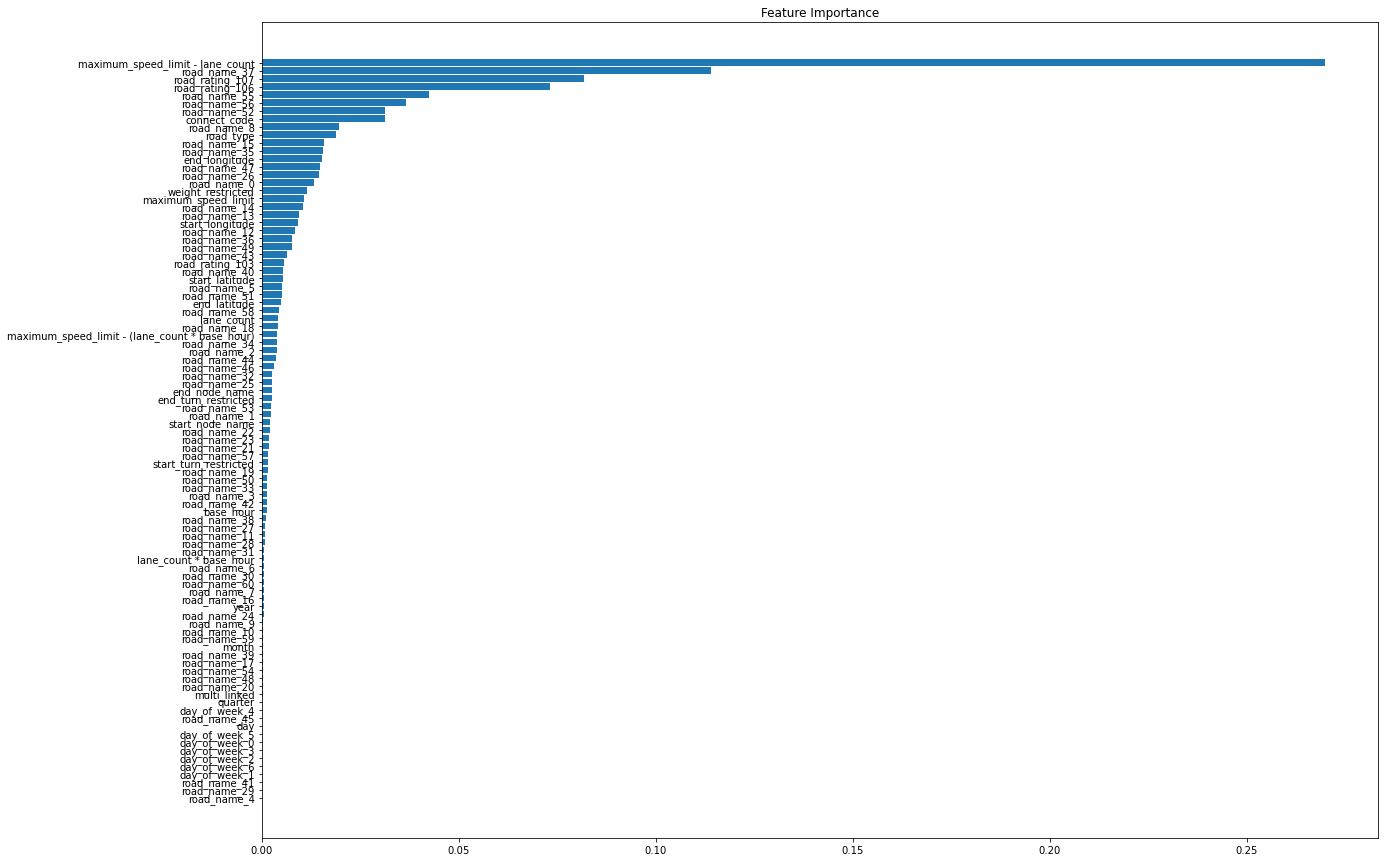

In [35]:
feature_importance = xgb_grid.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_xgb.columns)[sorted_idx])
plt.title('Feature Importance')

In [25]:
output = pd.DataFrame({'id' : test.id, 'target':pred_xgb})
output.to_csv('xgb_onehot.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
